In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [149]:
df=pd.read_table('https://raw.githubusercontent.com/codebasics/py/master/DataScience/BangloreHomePrices/model/bengaluru_house_prices.csv',sep=',')
df.head()

area_type   availability  ... balcony   price
0  Super built-up  Area         19-Dec  ...     1.0   39.07
1            Plot  Area  Ready To Move  ...     3.0  120.00
2        Built-up  Area  Ready To Move  ...     3.0   62.00
3  Super built-up  Area  Ready To Move  ...     1.0   95.00
4  Super built-up  Area  Ready To Move  ...     1.0   51.00

[5 rows x 9 columns]

In [150]:
df.shape

(13320, 9)

In [151]:
df.groupby('area_type').describe()

bath                      ...  price                 
                       count      mean       std  ...    50%      75%     max
area_type                                         ...                        
Built-up  Area        2410.0  2.649378  1.250774  ...   70.0  120.000  2050.0
Carpet  Area            87.0  2.505747  1.170108  ...   70.0  100.000   500.0
Plot  Area            2009.0  3.893479  2.022681  ...  140.0  240.000  3600.0
Super built-up  Area  8741.0  2.430386  0.970320  ...   65.0   98.195  2912.0

[4 rows x 24 columns]

In [152]:
df.groupby('area_type').area_type.agg(['count'])


count
area_type                  
Built-up  Area         2418
Carpet  Area             87
Plot  Area             2025
Super built-up  Area   8790

In [153]:
df1=df.drop(['area_type','society','balcony','availability'],axis=1)
df1.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [154]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [155]:
df2=df1.dropna()
df2.isnull().sum()


location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [156]:
df2.shape

(13246, 5)

In [157]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [158]:
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))
df2=df2.drop('size',axis=1)
df2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


location total_sqft  bath   price  bhk
0  Electronic City Phase II       1056   2.0   39.07    2
1          Chikka Tirupathi       2600   5.0  120.00    4
2               Uttarahalli       1440   2.0   62.00    3
3        Lingadheeranahalli       1521   3.0   95.00    3
4                  Kothanur       1200   2.0   51.00    2

In [159]:
df2[df2.bhk>=23]

location total_sqft  bath  price  bhk
1718  2Electronic City Phase II       8000  27.0  230.0   27
4684                Munnekollal       2400  40.0  660.0   43

In [160]:
type(df2.total_sqft.values[0])

str

In [161]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [0]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [163]:
df2[~df2['total_sqft'].apply(is_float)]
df2.shape

(13246, 5)

In [0]:
def convert_range_to_num(x):      
      tokens=x.split('-')
      if(len(tokens)==2):             
             return (float(tokens[0])+float(tokens[1]))/2
      try:
         return float(x)
      except:          
          return None
    

In [165]:
df3=df2.copy()
df3['total_sqft']=df2['total_sqft'].apply(convert_range_to_num)
df3.shape

(13246, 5)

In [166]:
df3.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [0]:
#df3=df3.dropna()

In [168]:
df3.shape

(13246, 5)

In [0]:
df4=df3.copy()
df4['price_per_sqft']=df4['price']*100000/df4['total_sqft']


In [170]:
df4.head()

location  total_sqft  bath   price  bhk  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000

In [0]:
location_count=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [172]:
location_count.head()


location
Whitefield         534
Sarjapur  Road     392
Electronic City    302
Kanakpura Road     266
Thanisandra        233
Name: location, dtype: int64

In [173]:
location_count_less_then_10=location_count[location_count<10]
len(location_count_less_then_10)

1051

In [0]:
df4.location=df4.location.apply(lambda x:'other' if x in location_count_less_then_10 else x)

In [175]:
len(df4.location.unique())

254

In [176]:
df4.head()

location  total_sqft  bath   price  bhk  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000

In [0]:
x=[1,2,4,5,6.7,4.6,'3-0']

In [0]:
def get(x):
  try:
    float(x)
  except:
    return False
  return True

In [179]:
for i in x:
  print(get(i))

True
True
True
True
True
True
False


In [180]:
df4[df4.total_sqft/df4.bhk<=300].head()

location  total_sqft  bath  price  bhk  price_per_sqft
9           other      1020.0   6.0  370.0    6    36274.509804
45     HSR Layout       600.0   9.0  200.0    8    33333.333333
58  Murugeshpalya      1407.0   4.0  150.0    6    10660.980810
68          other      1350.0   7.0   85.0    8     6296.296296
70          other       500.0   3.0  100.0    3    20000.000000

In [181]:
df5=df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12502, 6)

In [0]:
def get_stats(df,location):
      df=df[(df.location==location)]
      plt.scatter(df.total_sqft,df.price,color='blue',marker='+')
      plt.xlabel('area(sq ft')
      plt.ylabel('price')
      plt.title(location)
      plt.legend()

No handles with labels found to put in legend.


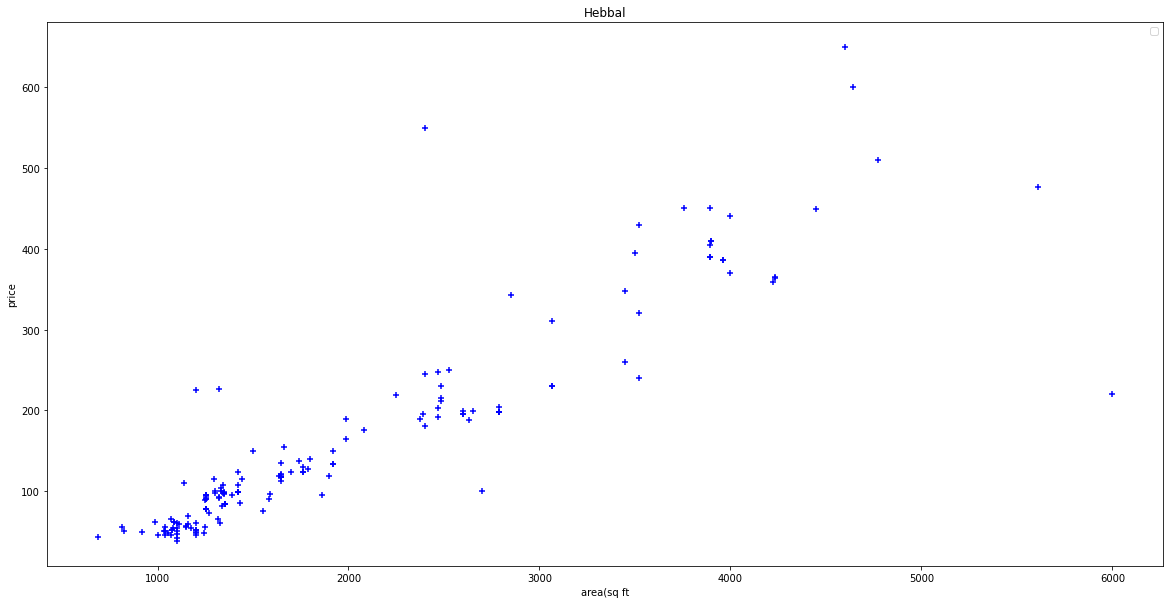

In [183]:
get_stats(df5,'Hebbal')

In [184]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [0]:
def remove_pps_outliers(df):
    output_df=pd.DataFrame()
    for key,subdf in df.groupby('location'):
         mean=np.mean(subdf.price_per_sqft)
         std=np.std(subdf.price_per_sqft)
         reduced_df=subdf[(subdf.price_per_sqft>(mean-std)) & (subdf.price_per_sqft<=(mean+std))]
         output_df=pd.concat([output_df,reduced_df],ignore_index=True)
         #print(len(output_df))
    return output_df


In [186]:
df6=remove_pps_outliers(df5)
df6.shape

(10226, 6)

In [0]:
#checked for 3,4,5,6 
def get_stats(df,location):
      bhk2=df[(df.location==location) & (df.bhk==2)]
      bhk3=df[(df.location==location) &(df.bhk==3)]
      plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2bhk')
      plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3bhk',marker='+')
      plt.xlabel('area(sq ft')
      plt.ylabel('price')
      plt.title(location)
      plt.legend()

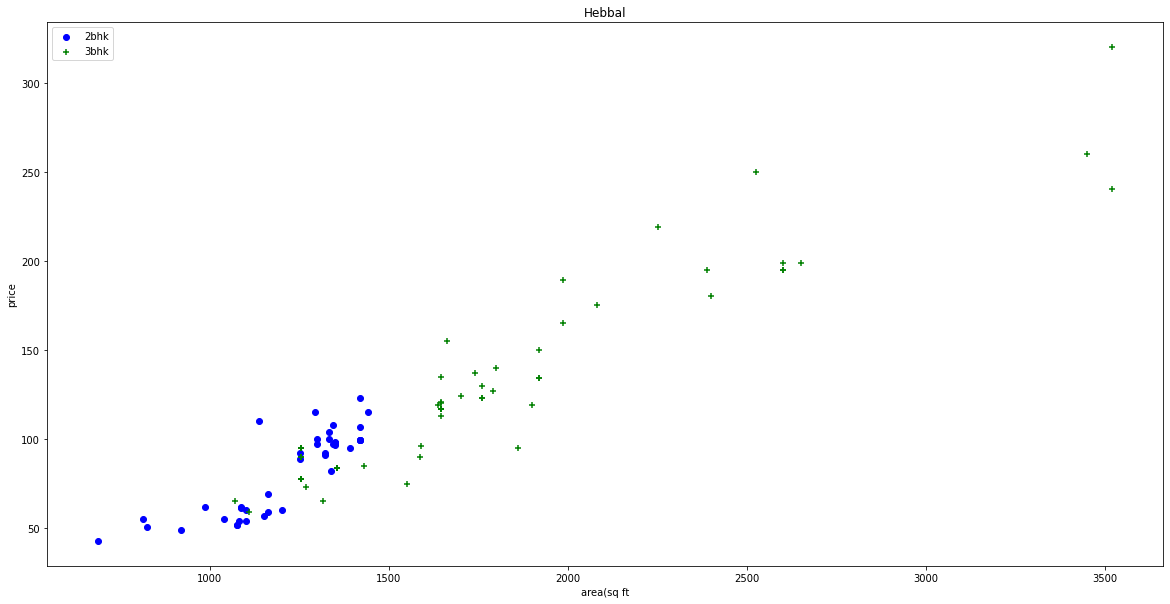

In [204]:
get_stats(df6,'Hebbal')

In [0]:
def remove_bhk_outliers(df):
  exclude_index=np.array([])
  for location,location_df in df.groupby('location'):
       bhk_stats={}
       for bhk,bhk_df in location_df.groupby('bhk'):
           mean_pps=np.mean(bhk_df['price_per_sqft'])
           std_pps=np.std(bhk_df['price_per_sqft'])
           count=bhk_df.shape[0]
           bhk_stats[bhk]={
              'mean':mean_pps,
              'std':std_pps,
              'count':count
           }
       for bhk,bhk_df in location_df.groupby('bhk'):
           stats=bhk_stats.get(bhk-1)
           if stats and stats['count']>5:
               exclude_index=np.append(exclude_index,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_index,axis='index')       

In [195]:
df7=remove_bhk_outliers(df6)
df7.shape

(7380, 6)

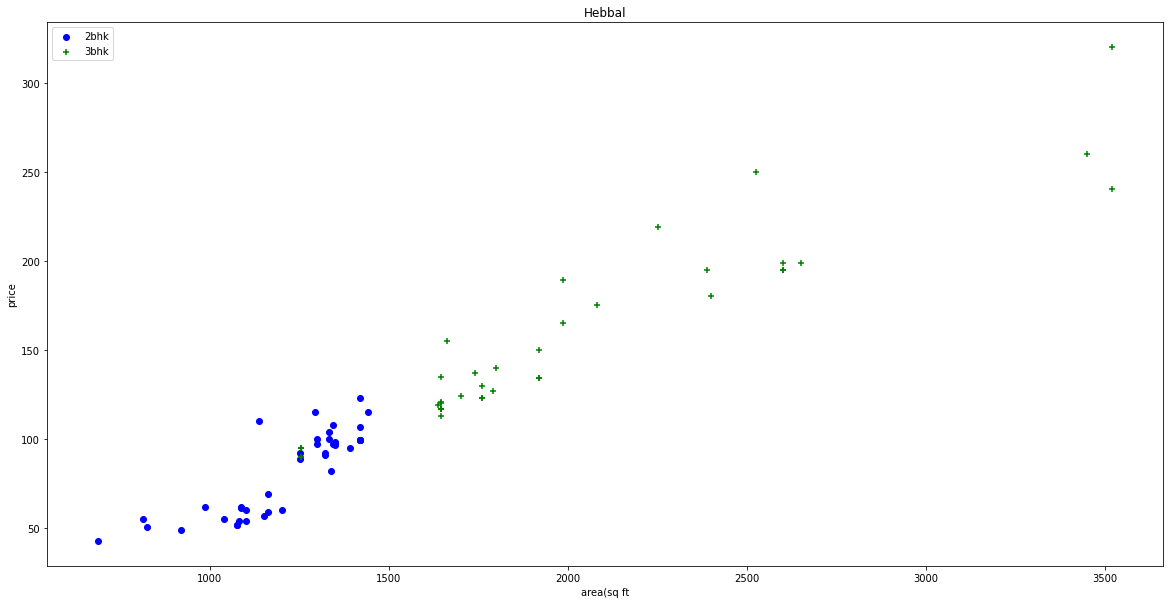

In [205]:
get_stats(df7,'Hebbal')

Text(0, 0.5, 'count')

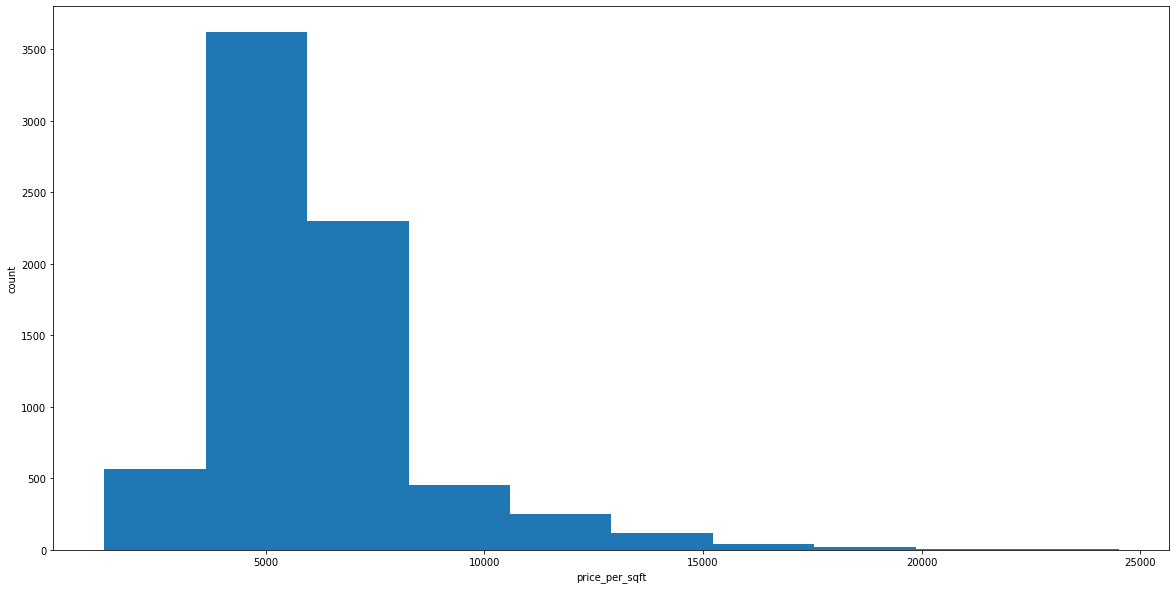

In [207]:
plt.hist(df7.price_per_sqft)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [209]:
df7.head()

location  total_sqft  bath  price  bhk  price_per_sqft
1   Devarachikkanahalli      1250.0   2.0   40.0    2     3200.000000
2   Devarachikkanahalli      1200.0   2.0   83.0    2     6916.666667
3   Devarachikkanahalli      1170.0   2.0   40.0    2     3418.803419
4   Devarachikkanahalli      1425.0   2.0   65.0    3     4561.403509
5   Devarachikkanahalli       947.0   2.0   43.0    2     4540.654699

In [210]:
df7.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6., 14.,  7.,  9., 12., 16., 13.])

In [211]:
df7[df7.bath>10]

location  total_sqft  bath  price  bhk  price_per_sqft
597    BTM 1st Stage      3300.0  14.0  500.0    9    15151.515152
5338  Neeladri Nagar      4000.0  12.0  160.0   10     4000.000000
8537           other     12000.0  12.0  525.0   10     4375.000000
8623           other     10000.0  16.0  550.0   16     5500.000000
9327           other      6000.0  12.0  150.0   11     2500.000000
9643           other      5425.0  13.0  275.0   13     5069.124424

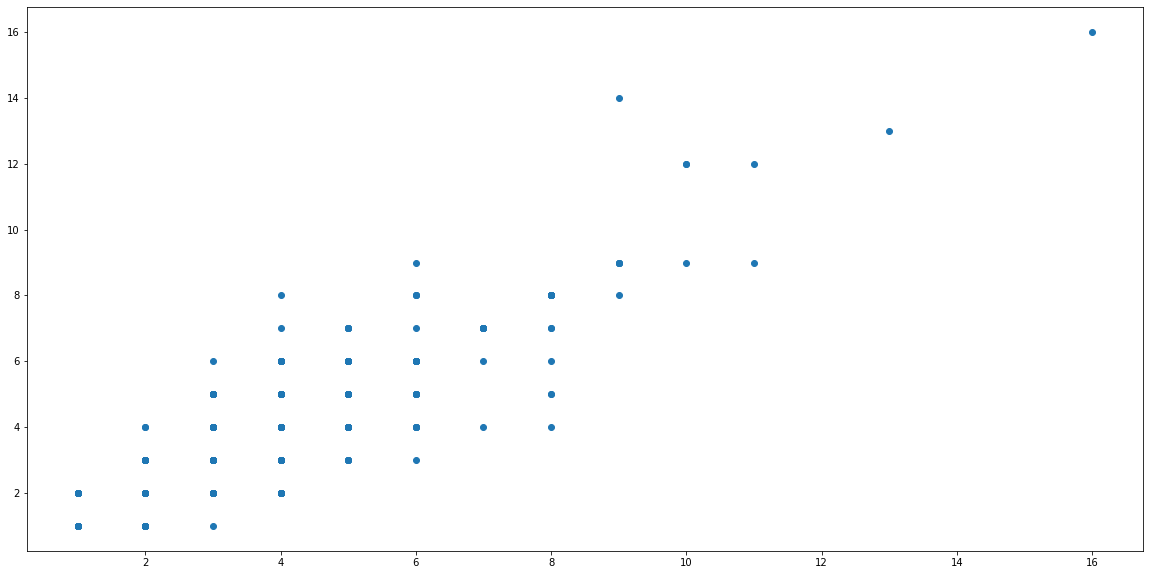

In [212]:
plt.scatter(df7.bhk,df7.bath)

In [224]:
df7[df7.bath>df7.bhk+2]

location  total_sqft  bath   price  bhk  price_per_sqft
597   BTM 1st Stage      3300.0  14.0   500.0    9    15151.515152
1653  Chikkabanavar      2460.0   7.0    80.0    4     3252.032520
5299     Nagasandra      7000.0   8.0   450.0    4     6428.571429
6776    Thanisandra      1806.0   6.0   116.0    3     6423.034330
8465          other     11338.0   9.0  1000.0    6     8819.897689

In [225]:
df8=df7[df7.bath<df7.bhk+2]
df8.shape

(7302, 6)

In [226]:
df9=df8.drop('price_per_sqft',axis=1)
df9.shape

(7302, 5)

In [228]:
dummies=pd.get_dummies(df9.location)
dummies.head()

Devarachikkanahalli  1st Block Jayanagar  ...  Yeshwanthpur  other
1                     1                    0  ...             0      0
2                     1                    0  ...             0      0
3                     1                    0  ...             0      0
4                     1                    0  ...             0      0
5                     1                    0  ...             0      0

[5 rows x 254 columns]

In [229]:
df10=pd.concat([df9,dummies],axis=1)
df10.head()

location  total_sqft  bath  ...  Yelenahalli  Yeshwanthpur  other
1   Devarachikkanahalli      1250.0   2.0  ...            0             0      0
2   Devarachikkanahalli      1200.0   2.0  ...            0             0      0
3   Devarachikkanahalli      1170.0   2.0  ...            0             0      0
4   Devarachikkanahalli      1425.0   2.0  ...            0             0      0
5   Devarachikkanahalli       947.0   2.0  ...            0             0      0

[5 rows x 259 columns]

In [231]:
df11=df10.drop('location',axis=1)
df11.head()

total_sqft  bath  price  ...  Yelenahalli  Yeshwanthpur  other
1      1250.0   2.0   40.0  ...            0             0      0
2      1200.0   2.0   83.0  ...            0             0      0
3      1170.0   2.0   40.0  ...            0             0      0
4      1425.0   2.0   65.0  ...            0             0      0
5       947.0   2.0   43.0  ...            0             0      0

[5 rows x 258 columns]

In [0]:
x=df11.drop('price',axis=1)
y=df11['price']

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [286]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8428479035921119

In [241]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)#Equal Distribution
cross_val_score(lr,x,y,cv=cv)

array([0.84384221, 0.82910369, 0.83378618, 0.84849956, 0.81197908])

In [302]:
import xgboost
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model = XGBRegressor(n_estimators=100,learning_rate=0.899)
my_model.fit(x_train,y_train)
my_model.score(x_test,y_test)

[03:22:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8839969117984994

In [0]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRegressor

models={
   'linear_regression':
    {
     'model':LinearRegression(),
     'params':
     {
         
     }
    },
    'lasso':
     {
     'model':Lasso(),
     'params':
      {
          'alpha':[1,2],
           'selection':['random','cyclic']
      }  
     },
     'decision_tree':
     {
         'model':DecisionTreeRegressor(),
          'params':
          {
            'criterion':['mse','friedman_mse'],
            'splitter':['best','random']
          }      
     },
    'XGB_Regressor':
    {
        'model':XGBRegressor( ),
         'params':
          {
              'objective' :['reg:squarederror'],
              'n_estimators':[100],
              'learning_rate':[0.8]
          }
    },
}

In [304]:

from sklearn.model_selection import GridSearchCV
scores=[]
for model_name,model in models.items():
   clf=GridSearchCV(model['model'],model['params'],cv=cv,return_train_score=False)
   clf.fit(x_train,y_train)
   print(clf.best_score_)
   scores.append([model_name,clf.best_score_,clf.best_params_])
scores


0.8335451889879393
0.7045081512371275
0.7400412156011915
0.7571282679927511


[['linear_regression', 0.8335451889879393, {}],
 ['lasso', 0.7045081512371275, {'alpha': 1, 'selection': 'cyclic'}],
 ['decision_tree',
  0.7400412156011915,
  {'criterion': 'friedman_mse', 'splitter': 'random'}],
 ['XGB_Regressor',
  0.7571282679927511,
  {'learning_rate': 0.8,
   'n_estimators': 100,
   'objective': 'reg:squarederror'}]]

In [295]:
best_scores=pd.DataFrame(scores,columns=['model','best_score','params'])
best_scores

model  ...                                             params
0  linear_regression  ...                                                 {}
1              lasso  ...                {'alpha': 1, 'selection': 'random'}
2      decision_tree  ...         {'criterion': 'mse', 'splitter': 'random'}
3      XGB_Regressor  ...  {'learning_rate': 0.9, 'n_estimators': 100, 'o...

[4 rows x 3 columns]

In [305]:
x.columns

Index(['total_sqft', 'bath', 'bhk', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'other'],
      dtype='object', length=257)

In [323]:
np.where(x.columns==' Devarachikkanahalli')[0][0]

3

In [349]:
x.head(2)

total_sqft  bath  bhk  ...  Yelenahalli  Yeshwanthpur  other
1      1250.0   2.0    2  ...            0             0      0
2      1200.0   2.0    2  ...            0             0      0

[2 rows x 257 columns]

In [0]:
def predict_score(location,total_sqft,bath,bhk):
   loc_index=np.where(x.columns==location)[0][0]
   #print(loc_index)
   inp=np.zeros(len(x.columns))
   inp[0]=total_sqft
   inp[1]=bath
   inp[2]=bhk
   inp[int(loc_index)]=1
   return lr.predict([inp])[0]

In [364]:
predict_score('Indira Nagar',1000,3,3)

182.24117315395287